# Tasca M4 T01
### Descripció
Utilitzant les biblioteques de visualització de dades Matplotlib o Seaborn, realitza els següents exercicis.

**RECORDA**: En la ciència de dades una de les tasques més importants és l'anàlisi. Una gràfica sempre ha d'anar acompanyada d'una explicació d'aquesta. Aporta informació.

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import matplotlib.dates as mdates
import missingno as msn 

print("Setup Complete")

Setup Complete


### Exercici 1
Descarrega el dataset adjunt **preu lloguer per trimestre i barri.csv** extret de la web ***OpenDataBCN*** i resumeix-lo **estadísticament** i **gràficament**.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [2]:
flat_rentals=pd.read_csv("./preu lloguer per trimestre i barri.csv")

In [3]:
flat_rentals.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [4]:
# rows, columns 
flat_rentals.shape

(584, 8)

In [5]:
# data is related only to 2021
flat_rentals["Any"].unique()

array([2021], dtype=int64)

In [6]:
# data type for each variable 

flat_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Variable "Preu" is data type `object`. We will have to convert it to `float`. 

In [7]:
flat_rentals["Preu"].sort_values()

422       --
420       --
418       --
265       --
411       --
       ...  
311    982.9
26     990.1
18     990.3
464    998.3
164    998.8
Name: Preu, Length: 584, dtype: object

We can observe two things.
1. Column "Preu" has data type *object*. We need to convert it to *float*, by **casting types**. 
2. The mean will be affected if we cast it as **zero**, making the mean not significant. We want the mean to ignore "*--*" values, we will have to cast it as ***#NaN***.

In [8]:
# replace "--" to "nan"

flat_rentals["Preu"].replace("--","nan",inplace=True)

**Casting types**.

In [9]:
# cast types to float

flat_rentals["Preu"].astype(float)

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: float64

In [10]:
# reassign the variable "Preu"
flat_rentals["Preu"]=flat_rentals["Preu"].astype(float)

We can see that "Preu" type is *float*.

In [11]:
flat_rentals.dtypes

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object

In [12]:
# districts in the dataset
lst_districs = flat_rentals["Nom_Districte"].unique()
lst_districs

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [13]:
# check for missing values in "flat_rentals"

flat_rentals.isna().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

Variable "Preu" has 44 missing values.

<AxesSubplot:>

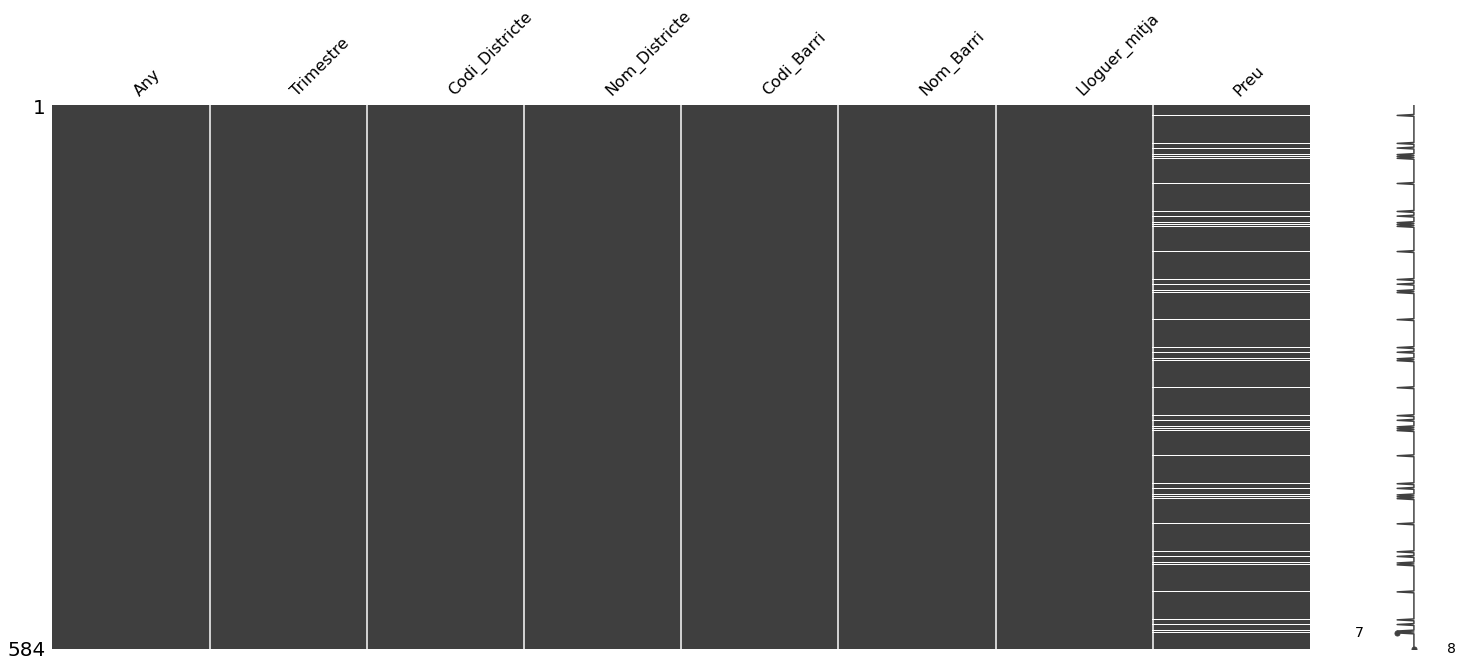

In [14]:
# we can observe that there are some missing values in column "Preu".
msn.matrix(flat_rentals)

# Let's analize the average monthly rent for Q1.

In [15]:
filt_Lloguer_mitja_mes_trimestre_primero= (flat_rentals["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)") & (flat_rentals["Trimestre"]==1)

In [16]:
flat_rentals.loc[filt_Lloguer_mitja_mes_trimestre_primero,"Preu"].describe().round()

count      67.0
mean      869.0
std       222.0
min       520.0
25%       741.0
50%       809.0
75%       928.0
max      1598.0
Name: Preu, dtype: float64

We can observe for **Q1** the following: 
- Average monthly rent is 869,00€.
- Median monthly rent is 809,00€. The mean is higher than the median due to the presence of extreme values. 
- Maximum value is 1598,00€ (almost twice the mean). 

In [17]:
flat_rentals.loc[filt_Lloguer_mitja_mes_trimestre_primero].count()

Any               73
Trimestre         73
Codi_Districte    73
Nom_Districte     73
Codi_Barri        73
Nom_Barri         73
Lloguer_mitja     73
Preu              67
dtype: int64

There are **six** missing values in **Q1** for "Lloguer mitjà mensual (Euros/mes)".

In [18]:
# check for unique values in column "Lloguer_mitja" 

flat_rentals["Lloguer_mitja"].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

### Una variable categòrica (Districte o Barri)

In [19]:
count_Barris = flat_rentals.loc[filt_Lloguer_mitja_mes_trimestre_primero,"Nom_Districte"].value_counts()
count_Barris

Nou Barris             13
Horta-Guinardó         11
Sant Martí             10
Sants-Montjuïc          8
Sant Andreu             7
Eixample                6
Sarrià-Sant Gervasi     6
Gràcia                  5
Ciutat Vella            4
Les Corts               3
Name: Nom_Districte, dtype: int64

In [20]:
# check number of districts
count_Barris.count()

10

[Text(0, 0, 'Nou Barris'),
 Text(0, 1, 'Horta-Guinardó'),
 Text(0, 2, 'Sant Martí'),
 Text(0, 3, 'Sants-Montjuïc'),
 Text(0, 4, 'Sant Andreu'),
 Text(0, 5, 'Eixample'),
 Text(0, 6, 'Sarrià-Sant Gervasi'),
 Text(0, 7, 'Gràcia'),
 Text(0, 8, 'Ciutat Vella'),
 Text(0, 9, 'Les Corts')]

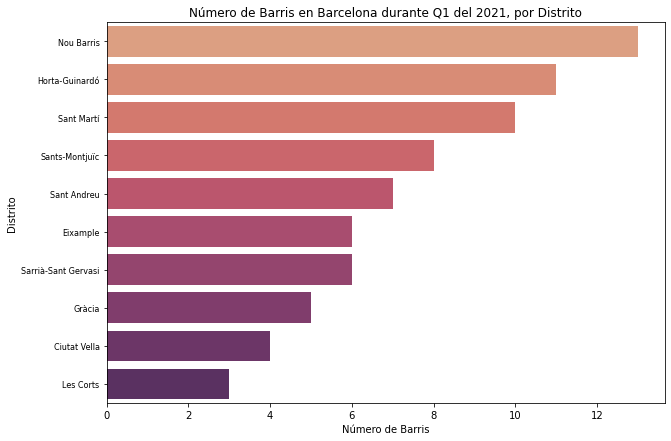

In [21]:
# set figure, axis as fig,ax
# set width and height 
fig, ax = plt.subplots(figsize=(10,7))

# create bar plot 
barplot_num_barris_q1 = sns.barplot(x=count_Barris.values, y = count_Barris.index,
           palette="flare", ax=ax)

# add a title
ax.set_title("Número de Barris en Barcelona durante Q1 del 2021, por Distrito")

# add label to y axis
ax.set_ylabel("Distrito")

# add label to x axis
ax.set_xlabel("Número de Barris")

# change the size of the y labels 
barplot_num_barris_q1.set_yticklabels(barplot_num_barris_q1.get_ymajorticklabels(), fontsize = 8)

We have ten districts. The district with the highest number of **neighbourhoods** is **Nou Barris** (13) and **Les Corts** has the least number of neighbourhoods (3).

### Una variable numèrica (Preu)

In [22]:
flat_rentals.loc[filt_Lloguer_mitja_mes_trimestre_primero,"Preu"].describe().round()

count      67.0
mean      869.0
std       222.0
min       520.0
25%       741.0
50%       809.0
75%       928.0
max      1598.0
Name: Preu, dtype: float64

Text(0, 0.5, 'Price')

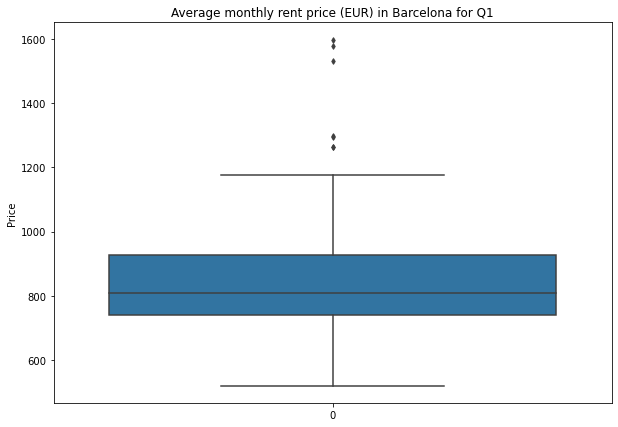

In [23]:
# set fig,ax 
# set width and height for figure
fig, ax = plt.subplots(figsize=(10,7))

# create box plot 
bxplt_av_rent_price_q1=sns.boxplot(data=flat_rentals.loc[filt_Lloguer_mitja_mes_trimestre_primero,"Preu"], fliersize=4, 
                                   ax=ax)

# set title
ax.set_title("Average monthly rent price (EUR) in Barcelona for Q1")

# set label for y label 
ax.set_ylabel("Price")


The above boxplot shows the quartiles of the variable "Preu" for Q1.
- Median is 809,00€/month. 
- 50% of the rents are between 700€/month and below 950€/month.
- 25% of the rents are above 950€/month. 
- There are five rental prices that are outliers, by using the inter-quartile range.

### Una variable numèrica i una categòrica (Districte i Preu)

https://www.data-to-viz.com/#density

# Average rent by area (EUR/m2)

In [24]:
filt_price_sq_meter=flat_rentals["Lloguer_mitja"]=="Lloguer mitjà per superfície (Euros/m2 mes)"

In [25]:
district_sq_meter_price = flat_rentals.loc[filt_price_sq_meter,["Nom_Districte","Preu"]]

In [26]:
district_sq_meter_price

,Nom_Districte,Preu
73,Ciutat Vella,12.8
74,Ciutat Vella,12.3
75,Ciutat Vella,15.5
76,Ciutat Vella,13.3
77,Eixample,12.9
...,...,...
579,Sant Martí,15.2
580,Sant Martí,10.8
581,Sant Martí,13.8
582,Sant Martí,11.7


In [27]:
district_sq_meter_price.describe()

,Preu
count,270.000000
mean,12.720741
std,1.701480
min,6.700000
25%,11.625000
50%,12.750000
75%,13.600000
max,18.000000


Text(0.5, 0, 'EUR/m2')

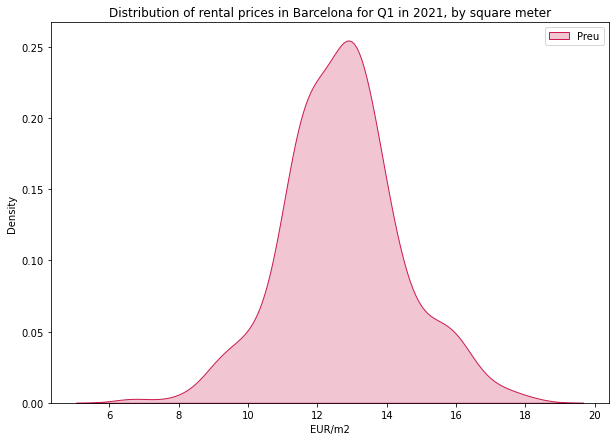

In [28]:
# set fig, ax for figure, axis
# set width and height 
fig, ax = plt.subplots(figsize=(10,7))

# create a kernel-density plot
kplot_rent_sqm_q1=sns.kdeplot(data=district_sq_meter_price, shade=True, palette="rocket", ax=ax)

# set title
ax.set_title("Distribution of rental prices in Barcelona for Q1 in 2021, by square meter")

# set label for x axis
ax.set_xlabel("EUR/m2")

Observations for Q1 in 2021 (Barcelona).
- Since the mean and the median are almost the same, the mean is representative for the distribution of rental prices based on EUR/m2.
- Standard deviation is *1,7*. The majority of the data is spread closer to the mean. 
- 50,00% of the prices EUR/m2 are above 11,62€/m2 and below 13,60€/m2. 

### Dues variables numèriques (Any o Trimestre i Preu)

In [29]:
# average rental prices grouped by "Lloguer_mitja" and "Trimestre"

grp_mean_rental_prices_q= flat_rentals.groupby(by=["Lloguer_mitja","Trimestre"], dropna=True)["Preu"].mean()
grp_mean_rental_prices_q

Lloguer_mitja                                Trimestre
Lloguer mitjà mensual (Euros/mes)            1            869.304478
                                             2            851.910294
                                             3            880.794030
                                             4            884.467647
Lloguer mitjà per superfície (Euros/m2 mes)  1             12.691045
                                             2             12.564706
                                             3             12.771642
                                             4             12.855882
Name: Preu, dtype: float64

Average rental prices by area (EUR/m2) for *Q1* - *Q4* in 2021. 

In [30]:
average_rental_prices_by_area= grp_mean_rental_prices_q.loc["Lloguer mitjà per superfície (Euros/m2 mes)"]
average_rental_prices_by_area

Trimestre
1    12.691045
2    12.564706
3    12.771642
4    12.855882
Name: Preu, dtype: float64

Text(0.5, 0, 'Quarter')

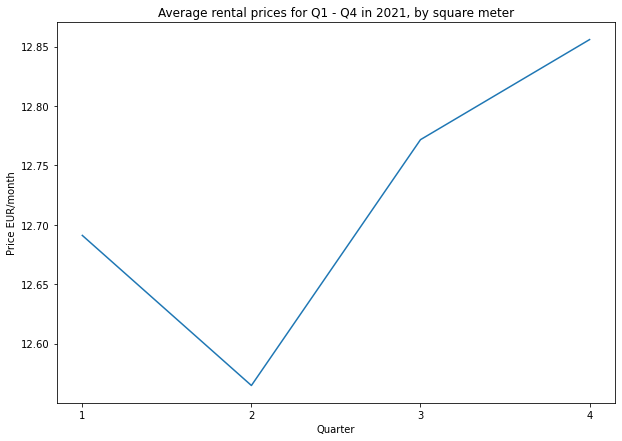

In [31]:
# create figure, axes as fig,ax
# set width and height for figure
fig, ax = plt.subplots(figsize=(10,7))

# create lineplot
lplot_average_rent_by_area_2021 = sns.lineplot(data=average_rental_prices_by_area, ax=ax)

lplot_average_rent_by_area_2021.set_xticks([1,2,3,4])

# set title
ax.set_title("Average rental prices for Q1 - Q4 in 2021, by square meter")

# set label for y axes
ax.set_ylabel("Price EUR/month")

# set label for x axis
ax.set_xlabel("Quarter")

We can see that the average rental price per m2 decreased in Q2 for 2021. However, it increased both in Q3 and Q4 resulting in 12.85 €/m2. 

**Just with the above information we can say that the best time to sign an agreement for a new rent was during Q2 of 2021**. 

### Tres variables (Barri o Districte, Trimestre i Preu)

In [32]:
# group by "Lloguer_mitja","Trimestre", "Nom_Districte"
# get average rental price (€/m2)

grp_average_price_area_by_districte=flat_rentals.groupby(by=["Lloguer_mitja","Trimestre","Nom_Districte"])["Preu"].mean()
grp_average_price_area_by_districte

Lloguer_mitja                                Trimestre  Nom_Districte      
Lloguer mitjà mensual (Euros/mes)            1          Ciutat Vella            844.275000
                                                        Eixample                980.783333
                                                        Gràcia                  867.880000
                                                        Horta-Guinardó          754.630000
                                                        Les Corts              1171.933333
                                                                                  ...     
Lloguer mitjà per superfície (Euros/m2 mes)  4          Nou Barris               10.880000
                                                        Sant Andreu              11.271429
                                                        Sant Martí               13.410000
                                                        Sants-Montjuïc           12.757143
              

In [33]:
# average rental prices per square meter, by "Trimestre" and "Nom_Districte" 

average_price_area_by_districte = grp_average_price_area_by_districte.loc["Lloguer mitjà per superfície (Euros/m2 mes)"]
average_price_area_by_districte

Trimestre  Nom_Districte      
1          Ciutat Vella           13.475000
           Eixample               13.200000
           Gràcia                 13.340000
           Horta-Guinardó         11.810000
           Les Corts              13.433333
           Nou Barris             10.940000
           Sant Andreu            11.550000
           Sant Martí             13.340000
           Sants-Montjuïc         12.728571
           Sarrià-Sant Gervasi    15.150000
2          Ciutat Vella           13.775000
           Eixample               13.133333
           Gràcia                 13.200000
           Horta-Guinardó         11.970000
           Les Corts              14.200000
           Nou Barris             10.910000
           Sant Andreu            10.628571
           Sant Martí             13.320000
           Sants-Montjuïc         12.600000
           Sarrià-Sant Gervasi    14.550000
3          Ciutat Vella           13.875000
           Eixample               13.283333
 

Text(0.5, 0, 'Quarter')

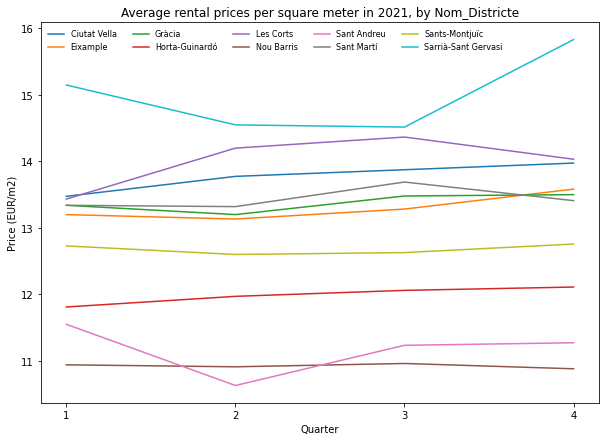

In [34]:
# set fig, ax for figure, axes
# set width and height for figure
fig, ax = plt.subplots(figsize=(10,7))

# create a lineplot
lnplot_average_rent_prices_sqm_district_2021=sns.lineplot(x="Trimestre", y=average_price_area_by_districte.values, 
                                                     hue="Nom_Districte",data=average_price_area_by_districte, ax=ax)
# set the ticks
lnplot_average_rent_prices_sqm_district_2021.set_xticks([1,2,3,4])

# change the legends location and font size
plt.legend(frameon=False, loc='upper left', fontsize=8, ncol=5)

# set title
ax.set_title("""Average rental prices per square meter in 2021, by Nom_Districte""")

# set y label 
ax.set_ylabel("Price (EUR/m2)")

# set x label 
ax.set_xlabel("Quarter")

- Most expensive district to live in 2021 was Sarrià-Sant Gervasi, which also had the highest increase of rental prices in **Q4**.
- The cheapest rent per square meter was in Sant Andreu during Q2. 
- Price per square meter in Sant Marí remained flat during the first three quarters and slightly falling in Q4. 
- EUR/m2 trend for *Gràcia* and *Sant Martí* was similar in the first three quarters of the year. However, EUR/m2 for *Sant Martí* fell while the one for *Gràcia* remained flat. 

We can classify the districs in: 
- Expensive:Ciutat Vella, Les Corts, Sarrià-Sant Gervasi.
- Cheap: Sant Andreu, Sant Martí. 
- The rest are closer to the mean or within the standard deviation (1,701480 €/m2)

In [35]:
district_sq_meter_price.describe()

,Preu
count,270.000000
mean,12.720741
std,1.701480
min,6.700000
25%,11.625000
50%,12.750000
75%,13.600000
max,18.000000


### Exercici 2
Exporta els gràfics com imatges o com HTML.

In [36]:
lst_plots = [barplot_num_barris_q1, bxplt_av_rent_price_q1, kplot_rent_sqm_q1, lplot_average_rent_by_area_2021, 
             lnplot_average_rent_prices_sqm_district_2021]

In [37]:
# create a function to save a plot with it's original title

def save_plot(plot):
    # use get_figure function and store the plot in a variable (plot_fig)
    plot_fig= plot.get_figure()
    title= str(plt.title)
    
    #give a desired name to the plot
    file_name = title[16:-2]+".jpeg"
    
    # use savefig function to save the plot 
    plot_fig.savefig(file_name)   

In [38]:
# apply function for each of the items in lst_plots
for plt in lst_plots:
    save_plot(plt)

### Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

In [39]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

import matplotlib.dates as mdates
import missingno as msn 

print("Setup Complete")

Setup Complete


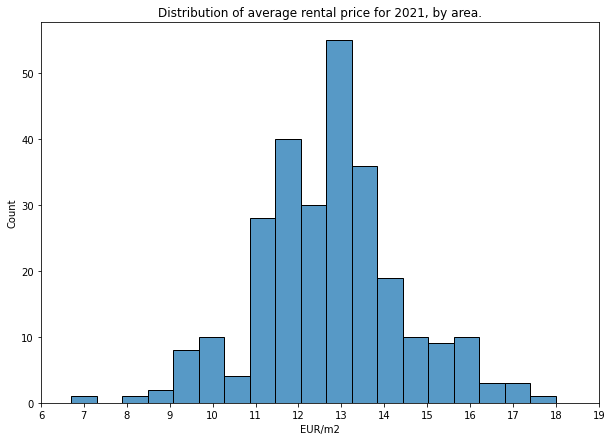

In [40]:
# set fig, ax for figure, axis
# set width and height 
fig, ax = plt.subplots(figsize=(10,7))

# create a histogram 
sns.histplot(data=district_sq_meter_price["Preu"])

# set title
ax.set_title("Distribution of average rental price for 2021, by area.")

# set label for x axis
ax.set_xlabel("EUR/m2")

# set ticks for x axis
ax.set_xticks([6,7,8,9,10,11,12,13,14,15,16,17,18,19])


We can observe the probability distribution for average rental prices by area (EUR/m2). The majority of the rentals are between 11 €/m2 and 14 m/2. 